In [11]:
from hybrids_pv import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import time
import pyswarms as ps
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)
from pyswarms.utils.plotters.formatters import Mesher

# %matplotlib inline

In [12]:
ghi, temp = read_environmental_data(r'C:\GitHub\OnSSET\Results\sl-2-pv.csv')
hours = np.arange(8760)
start_year = 2020
end_year = 2030

### Technology costs

In [13]:
diesel_cost=897  # diesel generator capital cost, USD/kW rated power
discount_rate=0.08
n_chg=0.92  # charge efficiency of battery
n_dis=0.92  # discharge efficiency of battery
battery_cost=139  # battery capital capital cost, USD/kWh of storage capacity
pv_cost=990  # PV panel capital cost, USD/kW peak power
pv_life=25  # PV panel expected lifetime, years
diesel_life=10  # diesel generator expected lifetime, years
pv_om=0.015  # annual OM cost of PV panels
diesel_om=0.1  # annual OM cost of diesel generator
inverter_cost=649
inverter_life=10
dod_max = 0.8  # maximum depth of discharge of battery
inv_eff=0.92  # inverter_efficiency
charge_controller=142

lpsp_max=0.05  # maximum loss of load allowed over the year, in share of kWh
diesel_limit = 0.5

### Settlement information 

In [14]:
settlement = {'ghi': 2300,  # Annual solar resource (kWh/m2)
              'diesel_price': 0.9,  # Diesel fuel price (USD/l) including transport cost
              'tier': 5,  # Demand Tier of the MTF
              'energy_demand': 100000}  # Annual electricity demand (kWh/year)

settlement_2 = {'ghi': 1700,  # Annual solar resource (kWh/m2)
              'diesel_price': 0.7,  # Diesel fuel price (USD/l) including transport cost
              'tier': 3,  # Demand Tier of the MTF
              'energy_demand': 50000}  # Annual electricity demand (kWh/year)

settlement_3 = {'ghi': 2000,  # Annual solar resource (kWh/m2)
              'diesel_price': 1.1,  # Diesel fuel price (USD/l) including transport cost
              'tier': 2,  # Demand Tier of the MTF
              'energy_demand': 7000}  # Annual electricity demand (kWh/year)

# Comparison of configurations

In [15]:
pv_sizes = 15
diesel_sizes = 15
battery_sizes = [0.25, 1] #, 2, 3]

In [16]:
outputs = pv_diesel_hybrid(settlement['energy_demand'], settlement['ghi'], ghi, temp, settlement['tier'], start_year, end_year, 
                            settlement['diesel_price'], pv_no=pv_sizes, diesel_no=diesel_sizes, battery_sizes=battery_sizes, array_output=True)

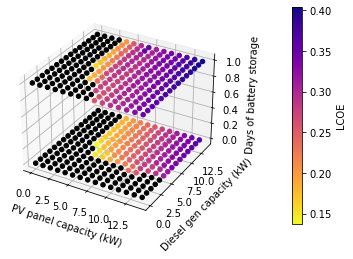

In [17]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
data = outputs[-4]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

z, x, y = data.nonzero()
p = ax.scatter(x, y, z, c=data, alpha=1, cmap='plasma_r')

ax.set_xlabel('PV panel capacity (kW)')
ax.set_ylabel('Diesel gen capacity (kW)')
ax.set_zlabel('Days of battery storage')

#xticks = outputs[-3]
#xlabels = list(np.around(np.array(xticks)))
#ax.set_xticklabels(xlabels)

yticks = outputs[-2]

zticks = outputs[-1]
#zlabels = list(np.around(np.array(zticks)))
#ax.set_zticklabels(zlabels)

fig.colorbar(p, pad=0.2, label='LCOE')
plt.show()


#  Current "brute-force" simulation approach

### Search space parameters

In [18]:
# battery_sizes = np.linspace(0.1, 3, steps).tolist()
diesel_and_pv_steps = [5, 10, 15, 20, 30, 40, 50] #, 75] #, 100] #, 200] # , 300, 400, 500] #, 750, 1000]

In [19]:
system_configurations = []
system_configurations_log = []
LCOE = []
Investment = []
PV_Capacity = []
Diesel_Capacity = []
Battery_capacity = []
Renewable_share = []
brute_force_simulation_time = []
brute_force_simulation_time_2 = []
brute_force_simulation_time_3 = []

system_configurations_2 = []
system_configurations_log_2 = []
LCOE_2 = []
Investment_2 = []
PV_Capacity_2 = []
Diesel_Capacity_2 = []
Battery_capacity_2 = []
Renewable_share_2 = []

system_configurations_3 = []
system_configurations_log_3 = []
LCOE_3 = []
Investment_3 = []
PV_Capacity_3 = []
Diesel_Capacity_3 = []
Battery_capacity_3 = []
Renewable_share_3 = []



for i in diesel_and_pv_steps:
    j = max(5, round(i / 10) + 1)
    battery_sizes = np.linspace(0.25, 3, i).tolist()
    t1 = time.time()
    lcoe = pv_diesel_hybrid(settlement['energy_demand'], settlement['ghi'], ghi, temp, settlement['tier'], start_year, end_year, 
                            settlement['diesel_price'], pv_no=i, diesel_no=i, battery_sizes=battery_sizes)
    t2 = time.time()
    lcoe_2 = pv_diesel_hybrid(settlement_2['energy_demand'], settlement_2['ghi'], ghi, temp, settlement_2['tier'], start_year, end_year, 
                            settlement_2['diesel_price'], pv_no=i, diesel_no=i, battery_sizes=battery_sizes)
    t3 = time.time()
        
    lcoe_3 = pv_diesel_hybrid(settlement_3['energy_demand'], settlement_3['ghi'], ghi, temp, settlement_3['tier'], start_year, end_year, 
                            settlement_3['diesel_price'], pv_no=i, diesel_no=i, battery_sizes=battery_sizes)
    t4 = time.time()

    system_configurations.append(lcoe[6])
    LCOE.append(lcoe[0])
    Investment.append(lcoe[1])
    PV_Capacity.append(lcoe[2])
    Diesel_Capacity.append(lcoe[3])
    Battery_capacity.append(lcoe[4])
    Renewable_share.append(lcoe[5])
    brute_force_simulation_time.append(t2-t1)
    
    system_configurations_2.append(lcoe_2[6])
    LCOE_2.append(lcoe_2[0])
    Investment_2.append(lcoe_2[1])
    PV_Capacity_2.append(lcoe_2[2])
    Diesel_Capacity_2.append(lcoe_2[3])
    Battery_capacity_2.append(lcoe_2[4])
    Renewable_share_2.append(lcoe_2[5])
    brute_force_simulation_time_2.append(t3-t2)
    
    system_configurations_3.append(lcoe_3[6])
    LCOE_3.append(lcoe_3[0])
    Investment_3.append(lcoe_3[1])
    PV_Capacity_3.append(lcoe_3[2])
    Diesel_Capacity_3.append(lcoe_3[3])
    Battery_capacity_3.append(lcoe_3[4])
    Renewable_share_3.append(lcoe_3[5])
    brute_force_simulation_time_3.append(t4-t3)

Text(0.5, 0, 'Number of configurations simulated')

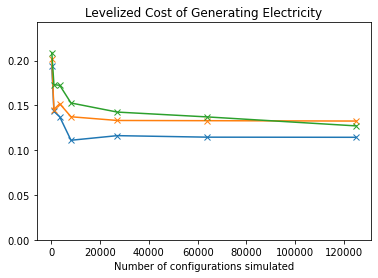

In [20]:
plt.plot(system_configurations, LCOE, marker='x')
plt.plot(system_configurations, LCOE_2, marker='x')
plt.plot(system_configurations, LCOE_3, marker='x')

plt.title('Levelized Cost of Generating Electricity')
plt.ylim([0, max(LCOE)*1.25])
plt.xlabel('Number of configurations simulated')

Text(0.5, 0, 'Number of configurations simulated')

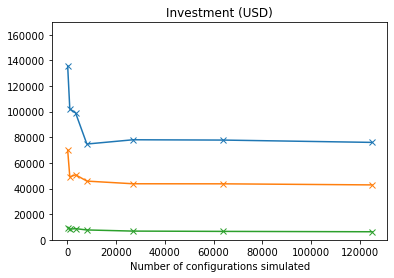

In [21]:
plt.plot(system_configurations, Investment, marker='x')
plt.plot(system_configurations, Investment_2, marker='x')
plt.plot(system_configurations, Investment_3, marker='x')

plt.title('Investment (USD)')
plt.ylim([0, max(Investment)*1.25])
plt.xlabel('Number of configurations simulated')

Text(0.5, 0, 'Number of configurations simulated')

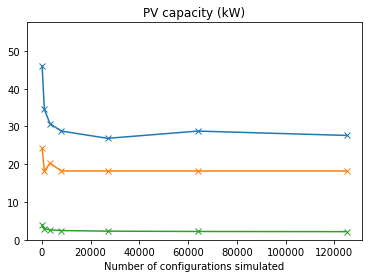

In [22]:
plt.plot(system_configurations, PV_Capacity, marker='x')
plt.plot(system_configurations, PV_Capacity_2, marker='x')
plt.plot(system_configurations, PV_Capacity_3, marker='x')

plt.title('PV capacity (kW)')
plt.ylim([0, max(PV_Capacity)*1.25])
plt.xlabel('Number of configurations simulated')

Text(0.5, 0, 'Number of configurations simulated')

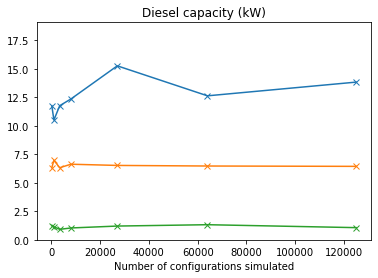

In [23]:
plt.plot(system_configurations, Diesel_Capacity, marker='x')
plt.plot(system_configurations, Diesel_Capacity_2, marker='x')
plt.plot(system_configurations, Diesel_Capacity_3, marker='x')

plt.title('Diesel capacity (kW)')
plt.ylim([0, max(Diesel_Capacity)*1.25])
plt.xlabel('Number of configurations simulated')

Text(0.5, 0, 'Number of configurations simulated')

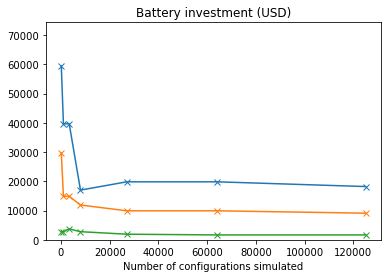

In [24]:
plt.plot(system_configurations, Battery_capacity, marker='x')
plt.plot(system_configurations, Battery_capacity_2, marker='x')
plt.plot(system_configurations, Battery_capacity_3, marker='x')

plt.title('Battery investment (USD)')
plt.ylim([0, max(Battery_capacity)*1.25])
plt.xlabel('Number of configurations simulated')

In [33]:
for s,t,l,b in zip(system_configurations, brute_force_simulation_time_2, LCOE_2, Battery_capacity_2):
    print('BF ran {} simulations in {} sec and found optimal LCOE at {} USD/kWh and battery inv. of {}k USD'.format(s, round(t,1), round(l, 3), round(b/1000,1)))

BF ran 125 simulations in 0.0 sec and found optimal LCOE at 0.202 USD/kWh and battery inv. of 29.8k USD
BF ran 1000 simulations in 0.2 sec and found optimal LCOE at 0.145 USD/kWh and battery inv. of 14.9k USD
BF ran 3375 simulations in 0.8 sec and found optimal LCOE at 0.152 USD/kWh and battery inv. of 14.9k USD
BF ran 8000 simulations in 1.7 sec and found optimal LCOE at 0.137 USD/kWh and battery inv. of 11.9k USD
BF ran 27000 simulations in 6.2 sec and found optimal LCOE at 0.133 USD/kWh and battery inv. of 9.9k USD
BF ran 64000 simulations in 15.0 sec and found optimal LCOE at 0.133 USD/kWh and battery inv. of 9.9k USD
BF ran 125000 simulations in 30.6 sec and found optimal LCOE at 0.132 USD/kWh and battery inv. of 9.1k USD


# Alternative approach using Particle Swarm Optimization (PSO)

Using the open source PySwarms package (https://pyswarms.readthedocs.io/en/latest/intro.html)

In [26]:
ghi_local_1 = ghi * settlement['ghi'] * 1000 / ghi.sum()
ghi_local_2 = ghi * settlement_2['ghi'] * 1000 / ghi.sum()
ghi_local_3 = ghi * settlement_3['ghi'] * 1000 / ghi.sum()

hour_numbers = np.empty(8760)
for i in prange(365):
    for j in prange(24):
        hour_numbers[i * 24 + j] = j

load_curve_1 = calc_load_curve(settlement['tier'], settlement['energy_demand'])
load_curve_2 = calc_load_curve(settlement_2['tier'], settlement_2['energy_demand'])
load_curve_3 = calc_load_curve(settlement_3['tier'], settlement_3['energy_demand'])

In [27]:
pv_min = 0
battery_min_1 = 0.25 * (settlement['energy_demand'] / 365)
battery_min_2 = 0.25 * (settlement_2['energy_demand'] / 365)
battery_min_3 = 0.25 * (settlement_3['energy_demand'] / 365)
diesel_min = 0.5
min_bounds_1 = np.array([pv_min, battery_min_1, diesel_min])
min_bounds_2 = np.array([pv_min, battery_min_2, diesel_min])
min_bounds_3 = np.array([pv_min, battery_min_3, diesel_min])

pv_max_1 = 5 * load_curve_1[19]
pv_max_2 = 5 * load_curve_2[19]
pv_max_3 = 5 * load_curve_3[19]
battery_max_1 = 5 * (settlement['energy_demand'] / 365)
battery_max_2 = 5 * (settlement_2['energy_demand'] / 365)
battery_max_3 = 5 * (settlement_3['energy_demand'] / 365)
diesel_max_1 = max(load_curve_1)
diesel_max_2 = max(load_curve_2)
diesel_max_3 = max(load_curve_3)
max_bounds_1 = np.array([pv_max_1, battery_max_1, diesel_max_1])
max_bounds_2 = np.array([pv_max_2, battery_max_2, diesel_max_2])
max_bounds_3 = np.array([pv_max_3, battery_max_3, diesel_max_3])

bounds_1 = (min_bounds_1, max_bounds_1)
bounds_2 = (min_bounds_2, max_bounds_2)
bounds_3 = (min_bounds_3, max_bounds_3)

In [28]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
optimizer_1 = ps.single.GlobalBestPSO(n_particles=100, dimensions=3, options=options, bounds=bounds_1)
optimizer_2 = ps.single.GlobalBestPSO(n_particles=100, dimensions=3, options=options, bounds=bounds_2)
optimizer_3 = ps.single.GlobalBestPSO(n_particles=100, dimensions=3, options=options, bounds=bounds_3)

In [29]:
def opt_func_1(X):
    n_particles = X.shape[0]
    lcoe = [find_least_cost_option(X[i], temp, ghi_local_1, hour_numbers,
                              load_curve_1, inv_eff, n_dis, n_chg, dod_max, settlement['energy_demand'], settlement['diesel_price'],
                              end_year, start_year, pv_cost, charge_controller, pv_om, diesel_cost,
                              diesel_om, inverter_life, inverter_cost, diesel_life, pv_life, battery_cost, discount_rate, lpsp_max, diesel_limit) for i in range (n_particles)]
    return np.array(lcoe)

def opt_func_2(X):
    n_particles = X.shape[0]
    lcoe = [find_least_cost_option(X[i], temp, ghi_local_2, hour_numbers,
                              load_curve_2, inv_eff, n_dis, n_chg, dod_max, settlement_2['energy_demand'], settlement_2['diesel_price'],
                              end_year, start_year, pv_cost, charge_controller, pv_om, diesel_cost,
                              diesel_om, inverter_life, inverter_cost, diesel_life, pv_life, battery_cost, discount_rate, lpsp_max, diesel_limit) for i in range (n_particles)]
    return np.array(lcoe)

def opt_func_3(X):
    n_particles = X.shape[0]
    lcoe = [find_least_cost_option(X[i], temp, ghi_local_3, hour_numbers,
                              load_curve_3, inv_eff, n_dis, n_chg, dod_max, settlement_3['energy_demand'], settlement_3['diesel_price'],
                              end_year, start_year, pv_cost, charge_controller, pv_om, diesel_cost,
                              diesel_om, inverter_life, inverter_cost, diesel_life, pv_life, battery_cost, discount_rate, lpsp_max, diesel_limit) for i in range (n_particles)]
    return np.array(lcoe)

In [30]:
cost_1, pos_1 = optimizer_1.optimize(opt_func_1, iters=1000)
cost_2, pos_2 = optimizer_2.optimize(opt_func_2, iters=1000)
cost_3, pos_3 = optimizer_3.optimize(opt_func_3, iters=1000)

2022-03-29 13:55:53,570 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|1000/1000, best_cost=0.102
2022-03-29 13:56:21,480 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.10169027340477946, best pos: [26.64746161 72.45350131 11.78882624]
2022-03-29 13:56:21,482 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████|1000/1000, best_cost=0.128
2022-03-29 13:56:53,810 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.12773973502765582, best pos: [17.22972181 36.13147144  6.69542364]
2022-03-29 13:56:53,811 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|█████████████████

In [31]:
swarm_out_1 = find_least_cost_option(pos_1, temp, ghi_local_1, hour_numbers,
                              load_curve_1, inv_eff, n_dis, n_chg, dod_max, settlement['energy_demand'], settlement['diesel_price'],
                              end_year, start_year, pv_cost, charge_controller, pv_om, diesel_cost,
                              diesel_om, inverter_life, inverter_cost, diesel_life, pv_life, battery_cost, discount_rate, lpsp_max, diesel_limit, simple=False)

swarm_out_2 = find_least_cost_option(pos_2, temp, ghi_local_2, hour_numbers,
                              load_curve_2, inv_eff, n_dis, n_chg, dod_max, settlement_2['energy_demand'], settlement_2['diesel_price'],
                              end_year, start_year, pv_cost, charge_controller, pv_om, diesel_cost,
                              diesel_om, inverter_life, inverter_cost, diesel_life, pv_life, battery_cost, discount_rate, lpsp_max, diesel_limit, simple=False)

swarm_out_3 = find_least_cost_option(pos_3, temp, ghi_local_3, hour_numbers,
                              load_curve_3, inv_eff, n_dis, n_chg, dod_max, settlement_3['energy_demand'], settlement_3['diesel_price'],
                              end_year, start_year, pv_cost, charge_controller, pv_om, diesel_cost,
                              diesel_om, inverter_life, inverter_cost, diesel_life, pv_life, battery_cost, discount_rate, lpsp_max, diesel_limit, simple=False)

In [32]:
print('Settlement 1')
print('Brute force approach')
print('LCOE: ' + str(round(LCOE[-1],3)))
print('PV Capacity (kW): ' + str(round(PV_Capacity[-1],1)))
print('Diesel Capacity (kW): ' + str(round(Diesel_Capacity[-1],1)))
print('Battery capacity (kWh): ' + str(round(Battery_capacity[-1], 1)))
print('')
print('Particle Swarm Optimization')
print('LCOE: ' + str(round(cost_1,3)))
print('PV Capacity (kW): ' + str(round(pos_1[0],1)))
print('Diesel Capacity (kW): ' + str(round(pos_1[2],1)))
print('Battery capacity (kWh): ' + str(round(swarm_out_1[-1], 1)))
print('')
print('Settlement 2')
print('Brute force approach')
print('LCOE: ' + str(round(LCOE_2[-1],3)))
print('PV Capacity (kW): ' + str(round(PV_Capacity_2[-1],1)))
print('Diesel Capacity (kW): ' + str(round(Diesel_Capacity_2[-1],1)))
print('Battery capacity (kWh): ' + str(round(Battery_capacity_2[-1], 1)))
print('')
print('Particle Swarm Optimization')
print('LCOE: ' + str(round(cost_2,3)))
print('PV Capacity (kW): ' + str(round(pos_2[0],1)))
print('Diesel Capacity (kW): ' + str(round(pos_2[2],1)))
print('Battery capacity (kWh): ' + str(round(swarm_out_2[-1], 1)))
print('')
print('Settlement 3')
print('Brute force approach')
print('LCOE: ' + str(round(LCOE_3[-1],3)))
print('PV Capacity (kW): ' + str(round(PV_Capacity_3[-1],1)))
print('Diesel Capacity (kW): ' + str(round(Diesel_Capacity_3[-1],1)))
print('Battery capacity (kWh): ' + str(round(Battery_capacity_3[-1], 1)))
print('')
print('Particle Swarm Optimization')
print('LCOE: ' + str(round(cost_3,3)))
print('PV Capacity (kW): ' + str(round(pos_3[0],1)))
print('Diesel Capacity (kW): ' + str(round(pos_3[2],1)))
print('Battery capacity (kWh): ' + str(round(swarm_out_3[-1], 1)))

Settlement 1
Brute force approach
LCOE: 0.114
PV Capacity (kW): 27.6
Diesel Capacity (kW): 13.8
Battery capacity (kWh): 18215.3

Particle Swarm Optimization
LCOE: 0.102
PV Capacity (kW): 26.6
Diesel Capacity (kW): 11.8
Battery capacity (kWh): 13987.6

Settlement 2
Brute force approach
LCOE: 0.132
PV Capacity (kW): 18.2
Diesel Capacity (kW): 6.4
Battery capacity (kWh): 9107.7

Particle Swarm Optimization
LCOE: 0.128
PV Capacity (kW): 17.2
Diesel Capacity (kW): 6.7
Battery capacity (kWh): 8968.3

Settlement 3
Brute force approach
LCOE: 0.127
PV Capacity (kW): 2.2
Diesel Capacity (kW): 1.1
Battery capacity (kWh): 1666.1

Particle Swarm Optimization
LCOE: 0.13
PV Capacity (kW): 2.2
Diesel Capacity (kW): 1.3
Battery capacity (kWh): 1197.4


# PSO time benchmarking

In [37]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

optimizer_10 = ps.single.GlobalBestPSO(n_particles=10, dimensions=3, options=options, bounds=bounds_2)
optimizer_50 = ps.single.GlobalBestPSO(n_particles=50, dimensions=3, options=options, bounds=bounds_2)
optimizer_100 = ps.single.GlobalBestPSO(n_particles=100, dimensions=3, options=options, bounds=bounds_2)

t1 =  time.time()
cost_10_10, pos_10_10 = optimizer_10.optimize(opt_func_2, iters=10)
t_10_10 = time.time() - t1
swarm_out_10_10 = find_least_cost_option(pos_10_10, temp, ghi_local_2, hour_numbers,
                              load_curve_2, inv_eff, n_dis, n_chg, dod_max, settlement_2['energy_demand'], settlement_2['diesel_price'],
                              end_year, start_year, pv_cost, charge_controller, pv_om, diesel_cost,
                              diesel_om, inverter_life, inverter_cost, diesel_life, pv_life, battery_cost, discount_rate, lpsp_max, diesel_limit, simple=False)


t1 =  time.time()
cost_10_100, pos_10_100 = optimizer_10.optimize(opt_func_2, iters=100)
t_10_100 = time.time() - t1
swarm_out_10_100 = find_least_cost_option(pos_10_100, temp, ghi_local_2, hour_numbers,
                              load_curve_2, inv_eff, n_dis, n_chg, dod_max, settlement_2['energy_demand'], settlement_2['diesel_price'],
                              end_year, start_year, pv_cost, charge_controller, pv_om, diesel_cost,
                              diesel_om, inverter_life, inverter_cost, diesel_life, pv_life, battery_cost, discount_rate, lpsp_max, diesel_limit, simple=False)


t1 =  time.time()
cost_10_1000, pos_10_1000 = optimizer_10.optimize(opt_func_2, iters=1000)
t_10_1000 = time.time() - t1
swarm_out_10_1000 = find_least_cost_option(pos_10_1000, temp, ghi_local_2, hour_numbers,
                              load_curve_2, inv_eff, n_dis, n_chg, dod_max, settlement_2['energy_demand'], settlement_2['diesel_price'],
                              end_year, start_year, pv_cost, charge_controller, pv_om, diesel_cost,
                              diesel_om, inverter_life, inverter_cost, diesel_life, pv_life, battery_cost, discount_rate, lpsp_max, diesel_limit, simple=False)

t1 =  time.time()
cost_50_10, pos_50_10 = optimizer_50.optimize(opt_func_2, iters=10)
t_50_10 = time.time() - t1
swarm_out_50_10 = find_least_cost_option(pos_50_10, temp, ghi_local_2, hour_numbers,
                              load_curve_2, inv_eff, n_dis, n_chg, dod_max, settlement_2['energy_demand'], settlement_2['diesel_price'],
                              end_year, start_year, pv_cost, charge_controller, pv_om, diesel_cost,
                              diesel_om, inverter_life, inverter_cost, diesel_life, pv_life, battery_cost, discount_rate, lpsp_max, diesel_limit, simple=False)


t1 =  time.time()
cost_50_100, pos_50_100 = optimizer_50.optimize(opt_func_2, iters=100)
t_50_100 = time.time() - t1
swarm_out_50_100 = find_least_cost_option(pos_50_100, temp, ghi_local_2, hour_numbers,
                              load_curve_2, inv_eff, n_dis, n_chg, dod_max, settlement_2['energy_demand'], settlement_2['diesel_price'],
                              end_year, start_year, pv_cost, charge_controller, pv_om, diesel_cost,
                              diesel_om, inverter_life, inverter_cost, diesel_life, pv_life, battery_cost, discount_rate, lpsp_max, diesel_limit, simple=False)


t1 =  time.time()
cost_50_1000, pos_50_1000 = optimizer_50.optimize(opt_func_2, iters=1000)
t_50_1000 = time.time() - t1
swarm_out_50_1000 = find_least_cost_option(pos_50_1000, temp, ghi_local_2, hour_numbers,
                              load_curve_2, inv_eff, n_dis, n_chg, dod_max, settlement_2['energy_demand'], settlement_2['diesel_price'],
                              end_year, start_year, pv_cost, charge_controller, pv_om, diesel_cost,
                              diesel_om, inverter_life, inverter_cost, diesel_life, pv_life, battery_cost, discount_rate, lpsp_max, diesel_limit, simple=False)

t1 =  time.time()
cost_100_10, pos_100_10 = optimizer_100.optimize(opt_func_2, iters=10)
t_100_10 = time.time() - t1
swarm_out_100_10 = find_least_cost_option(pos_100_10, temp, ghi_local_2, hour_numbers,
                              load_curve_2, inv_eff, n_dis, n_chg, dod_max, settlement_2['energy_demand'], settlement_2['diesel_price'],
                              end_year, start_year, pv_cost, charge_controller, pv_om, diesel_cost,
                              diesel_om, inverter_life, inverter_cost, diesel_life, pv_life, battery_cost, discount_rate, lpsp_max, diesel_limit, simple=False)


t1 =  time.time()
cost_100_100, pos_100_100 = optimizer_100.optimize(opt_func_2, iters=100)
t_100_100 = time.time() - t1
swarm_out_100_100 = find_least_cost_option(pos_100_100, temp, ghi_local_2, hour_numbers,
                              load_curve_2, inv_eff, n_dis, n_chg, dod_max, settlement_2['energy_demand'], settlement_2['diesel_price'],
                              end_year, start_year, pv_cost, charge_controller, pv_om, diesel_cost,
                              diesel_om, inverter_life, inverter_cost, diesel_life, pv_life, battery_cost, discount_rate, lpsp_max, diesel_limit, simple=False)


t1 =  time.time()
cost_100_1000, pos_100_1000 = optimizer_100.optimize(opt_func_2, iters=1000)
t_100_1000 = time.time() - t1
swarm_out_100_1000 = find_least_cost_option(pos_100_1000, temp, ghi_local_2, hour_numbers,
                              load_curve_2, inv_eff, n_dis, n_chg, dod_max, settlement_2['energy_demand'], settlement_2['diesel_price'],
                              end_year, start_year, pv_cost, charge_controller, pv_om, diesel_cost,
                              diesel_om, inverter_life, inverter_cost, diesel_life, pv_life, battery_cost, discount_rate, lpsp_max, diesel_limit, simple=False)


2022-03-29 14:04:04,354 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████████|10/10, best_cost=0.183
2022-03-29 14:04:04,403 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.18294160938076526, best pos: [ 21.4099122  142.44303211   5.46249837]
2022-03-29 14:04:04,406 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████████|100/100, best_cost=0.15
2022-03-29 14:04:04,824 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.15013274947123767, best pos: [19.95089688 67.43327192  6.53325351]
2022-03-29 14:04:04,826 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|█████████████████

In [38]:
particles = [10, 10, 10, 50, 50, 50, 100, 100, 100]
iterations = [10, 100, 1000, 10, 100, 1000, 10, 100, 1000]
times = [t_10_10, t_10_100, t_10_1000, t_50_10, t_50_100, t_50_1000, t_100_10, t_100_100, t_100_1000]
LCOEs = [cost_10_10, cost_10_100, cost_10_1000, cost_50_10, cost_50_100, cost_50_1000, cost_100_10, cost_100_100, cost_100_1000]
battery = [round(swarm_out_10_10[-1]/1000,1), round(swarm_out_10_100[-1]/1000,1), round(swarm_out_10_1000[-1]/1000,1),
           round(swarm_out_50_10[-1]/1000,1), round(swarm_out_50_100[-1]/1000,1), round(swarm_out_50_1000[-1]/1000,1),
           round(swarm_out_100_10[-1]/1000,1), round(swarm_out_100_100[-1]/1000,1), round(swarm_out_100_1000[-1]/1000,1)]

In [39]:
for p, i, t, l, b in zip(particles, iterations, times, LCOEs, battery):
    print('PSO with {} particles, {} iterations ran in {} sec. Found optimal LCOE at {} USD/kWh and battery inv. of {}k USD'.format(p, i, round(t, 1), round(l, 3), b))

PSO with 10 particles, 10 iterations ran in 0.1 sec. Found optimal LCOE at 0.183 USD/kWh and battery inv. of 19.0k USD
PSO with 10 particles, 100 iterations ran in 0.4 sec. Found optimal LCOE at 0.15 USD/kWh and battery inv. of 11.7k USD
PSO with 10 particles, 1000 iterations ran in 4.1 sec. Found optimal LCOE at 0.131 USD/kWh and battery inv. of 9.0k USD
PSO with 50 particles, 10 iterations ran in 0.1 sec. Found optimal LCOE at 0.138 USD/kWh and battery inv. of 9.9k USD
PSO with 50 particles, 100 iterations ran in 1.4 sec. Found optimal LCOE at 0.131 USD/kWh and battery inv. of 9.0k USD
PSO with 50 particles, 1000 iterations ran in 15.7 sec. Found optimal LCOE at 0.13 USD/kWh and battery inv. of 8.8k USD
PSO with 100 particles, 10 iterations ran in 0.3 sec. Found optimal LCOE at 0.155 USD/kWh and battery inv. of 13.8k USD
PSO with 100 particles, 100 iterations ran in 2.7 sec. Found optimal LCOE at 0.129 USD/kWh and battery inv. of 9.4k USD
PSO with 100 particles, 1000 iterations ran i